# Normal Equation

In [4]:
import numpy as np
import scipy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3)

The solution to the linear regression is $$\theta=(X^TX)^{-1}X^TY$$

## 1. Linear Regression with one variable

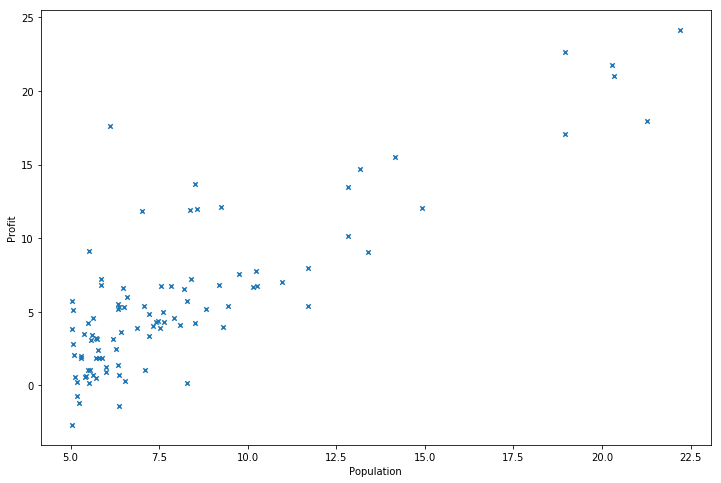

In [5]:
data1 = pd.read_csv("ex1data1.txt", header=None, names=['Population', 'Profit'])
data1_copy = data1
data1.plot(kind="scatter", x='Population', y='Profit', marker='x', figsize=(12, 8))

In [6]:
data1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data1.insert(0, 'x0', 1)
data1.head()

,x0,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [9]:
col = data1.shape[1]
data1_x = data1.iloc[:, :col - 1].values
data1_y = data1.iloc[:, col - 1:].values.ravel()

print(data1_x.shape)
print(data1_y.shape)

(97, 2)
(97,)


In [10]:
def normal_equation(x, y):
    return la.pinv(x.T @ x) @ x.T @ y

In [11]:
theta1 = normal_equation(data1_x, data1_y)
theta1

array([-3.896,  1.193])

Text(0.5, 1.0, 'Normal Equation')

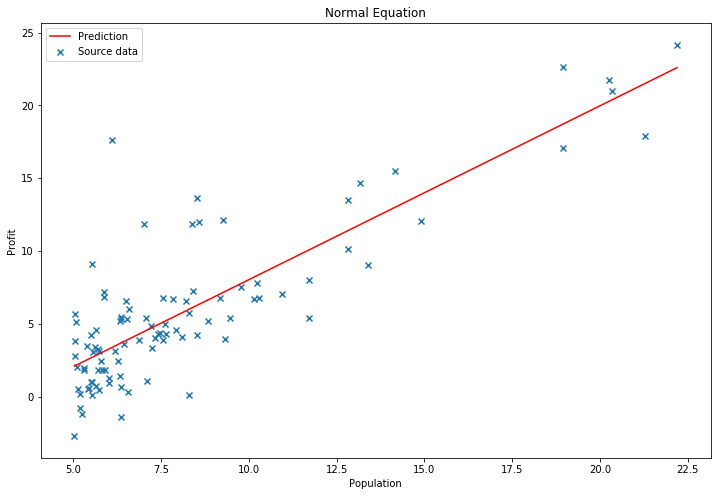

In [12]:
x = np.linspace(data1_copy.Population.min(), data1_copy.Population.max(), 100).reshape(100, 1)
x = np.insert(x, 0, values=np.ones(100), axis=1)
y = np.dot(x, theta1)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x[:, 1].flatten(), y.flatten(), 'r', label='Prediction')
ax.scatter(data1_copy.Population, data1_copy.Profit, marker='x', label='Source data')
ax.legend(loc=2)
ax.set_xlabel("Population")
ax.set_ylabel("Profit")
ax.set_title("Normal Equation")

## 2. Linear Regression with multiple variables

In [17]:
data2 = pd.read_csv("ex1data2.txt", header=None, names=['Size', 'Bedroom', 'Price'])
data2.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [18]:
data2.insert(0, 'x0', 1)

col = data2.shape[1]
data2_x = data2.iloc[:, :col - 1].values
data2_y = data2.iloc[:, col - 1:].values.ravel()

print(data2_x.shape)
print(data2_y.shape)

(47, 3)
(47,)


In [23]:
theta2 = normal_equation(data2_x, data2_y)
theta2

array([89597.91 ,   139.211, -8738.019])